# Team Tackle Metrics

Now more than ever, fast and agile receivers are becoming threats to defenses all across the league. These receivers specalize in Yards after Catch and force teams to adjust their formations in order to respond to them better. In order to reduce yard gains after catch, receivers needs to be tackled as fast as possible. We created a metric to evaluate teams and defensive coordinator play calling in how well their formations place players to be in a position to tackle right after catch.

#### First, we categorized players as either defenders or blockers for a specific play. We then used the basic distance formula (d = √(x2-x1)^2 + (y2-y1)^2) to calculate each players distance from the ball carrier. 

In [ ]:
passFull['type'] =  passFull.apply(lambda row: 'defender' if row['club'] != row['club_bc'] else ('ball_carrier' if row['nflId'] == row['nflId_bc'] else 'blocker') , axis=1)

In [ ]:
passFull['distance'] = np.sqrt((passFull["x_bc"] - passFull["x"])**2 + (passFull["y_bc"] - passFull["y"])**2)

#### We also identified if they were behind or ahead of the ball carrier using x and y coordinates on the field. We the began to evaluate if the player was in a good position to make a tackle on the ball carrier.

In [ ]:
passFull['relative_position'] = passFull.apply(lambda row: 'ahead' if ((row['playDirection'] == 'right' and row['x_bc'] < row['x']) or (row['playDirection'] == 'left' and row['x_bc'] > row['x'])) else 'behind', axis=1)

#### We do this by first identifying tackle zones, which we categorized into:
#### 1. 10 yards ahead to 5 yards behind the receiver

In [ ]:
passFull['tackleZone_5to10'] = passFull.apply(lambda row: 1 if ((row['relative_position'] == 'behind' and row['distance'] <= 5) or (row['relative_position'] == 'ahead' and row['distance'] <= 10)) else 0, axis=1)

#### 2. 7 yards ahead to 3 yards behind the receiver

In [ ]:
passFull['tackleZone_3to7'] = passFull.apply(lambda row: 1 if ((row['relative_position'] == 'behind' and row['distance'] <= 3) or (row['relative_position'] == 'ahead' and row['distance'] <= 7)) else 0, axis=1)

#### 3. 5 yards ahead to 2 yards behind the receiver

In [ ]:
passFull['tackleZone_2to5'] = passFull.apply(lambda row: 1 if ((row['relative_position'] == 'behind' and row['distance'] <= 2) or (row['relative_position'] == 'ahead' and row['distance'] <= 5)) else 0, axis=1)

#### 4. 3 yards ahead to 1 yard behind the receiver

In [ ]:
passFull['tackleZone_1to3'] = passFull.apply(lambda row: 1 if ((row['relative_position'] == 'behind' and row['distance'] <= 1) or (row['relative_position'] == 'ahead' and row['distance'] <= 3)) else 0, axis=1)We calculated the number of defenders in different tackle zones at the time of the catch based on the provided data for certain plays. This is our evaluation metric to see how well the formation was called based on if players were positioned well. We plotted this data onto a scatterplot.

#### We calculated the number of defenders in different tackle zones at the time of the catch based on the provided data for certain plays. This is our evaluation metric to see how well the formation was called based on if players were positioned well. We plotted this data onto a scatterplot.

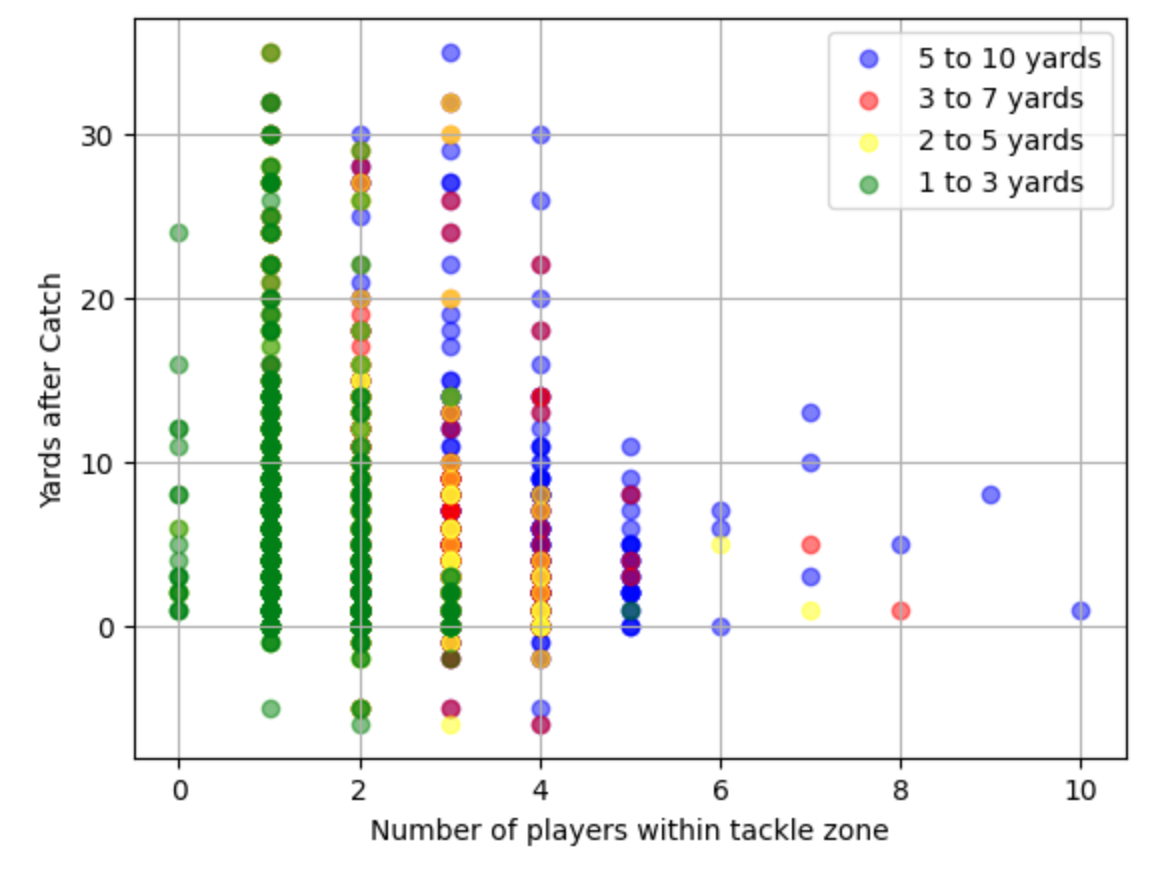

#### We plotted the average yards after catch for different numbers defenders for different zones. Based on this, we identified that as the number of defenders in the tackle zone decreases, the average yards after catch decreases. However in some cases, if defenders are positioned too close, the receiver can blow past them and gain significantly more yards after catch than if the defenders were positioned a little bit more outward.


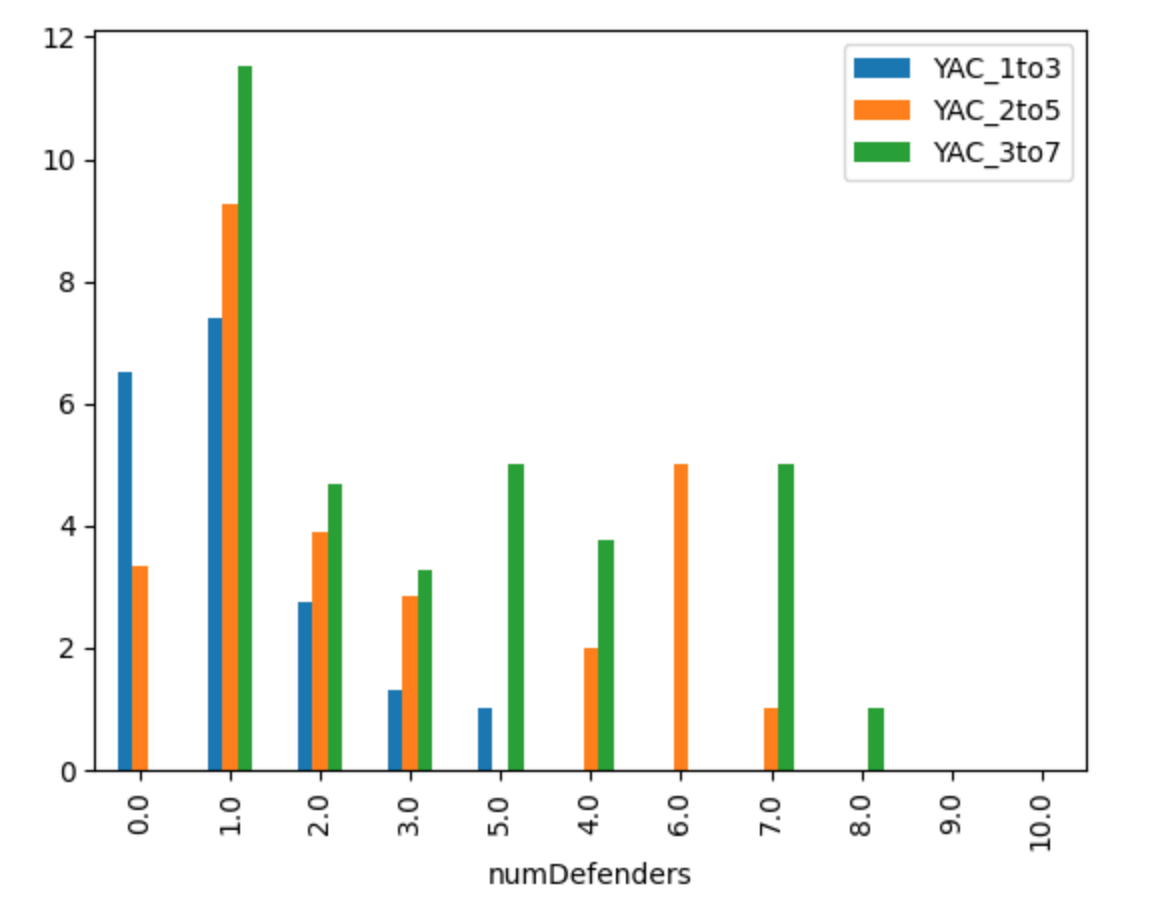

#### To add on and improve this program, we could take in to account player biometric data as well and consider the effect of blockers contributing to yards after catch as well


# All code can be found on Github 